## Exploratory Data Analysis on Spotify 2023 Dataset
Jasmine Nicole S. Pasc

In [1]:
#Access the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the Spotify data, read as UTF-8 to handle encoding
spotify_data = pd.read_csv('spotify-2023.csv', encoding='utf-8')

In [19]:
# Overview of Dataset
print("Dataset Dimensions:", spotify_data.shape)
print("\nData Types and Missing Values:\n")
print(spotify_data.info())
print("\nMissing Values per Column:\n", spotify_data.isnull().sum())


Dataset Dimensions: (953, 24)

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 n

In [23]:
# Converting 'streams' column to numeric, ignoring non-numeric values
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Calculating mean, median, and standard deviation for 'streams' column
mean_streams = spotify_data['streams'].mean()
median_streams = spotify_data['streams'].median()
std_dev_streams = spotify_data['streams'].std()

# Displaying the calculated statistics
print("Streams Column - Basic Statistics:")
print(f"Mean Value: {mean_streams}")
print(f"Median Value: {median_streams}")
print(f"Standard Deviation: {std_dev_streams}")


Streams Column - Basic Statistics:
Mean Value: 514137424.93907565
Median Value: 290530915.0
Standard Deviation: 566856949.0388832


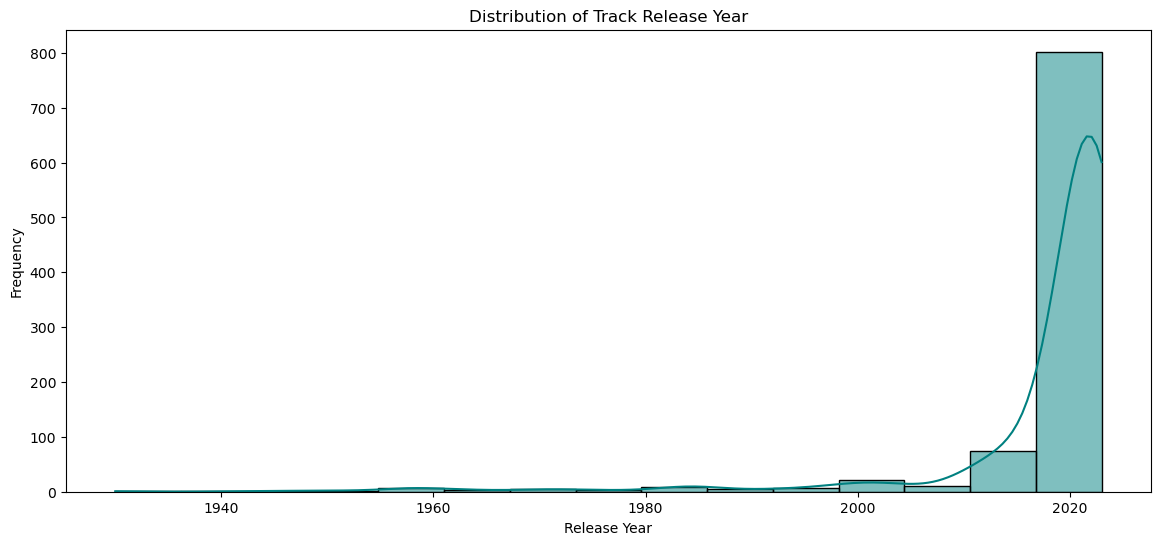

In [25]:
# Distribution of 'released_year' and 'artist_count'
plt.figure(figsize=(14, 6))
sns.histplot(spotify_data['released_year'], bins=15, kde=True, color='teal')
plt.title("Distribution of Track Release Year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()


In [27]:
# Top Performers
top_track = spotify_data.sort_values(by='streams', ascending=False).iloc[0]
print("\nTrack with Highest Streams:", top_track[['track_name', 'streams']])

top_tracks = spotify_data.sort_values(by='streams', ascending=False).head(5)
print("\nTop 5 Most Streamed Tracks:\n", top_tracks[['track_name', 'streams']])

top_artists = spotify_data['artist(s)_name'].value_counts().head(5)
print("\nTop 5 Most Frequent Artists:\n", top_artists)



Track with Highest Streams: track_name    Blinding Lights
streams          3703895074.0
Name: 55, dtype: object

Top 5 Most Streamed Tracks:
                                         track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09

Top 5 Most Frequent Artists:
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


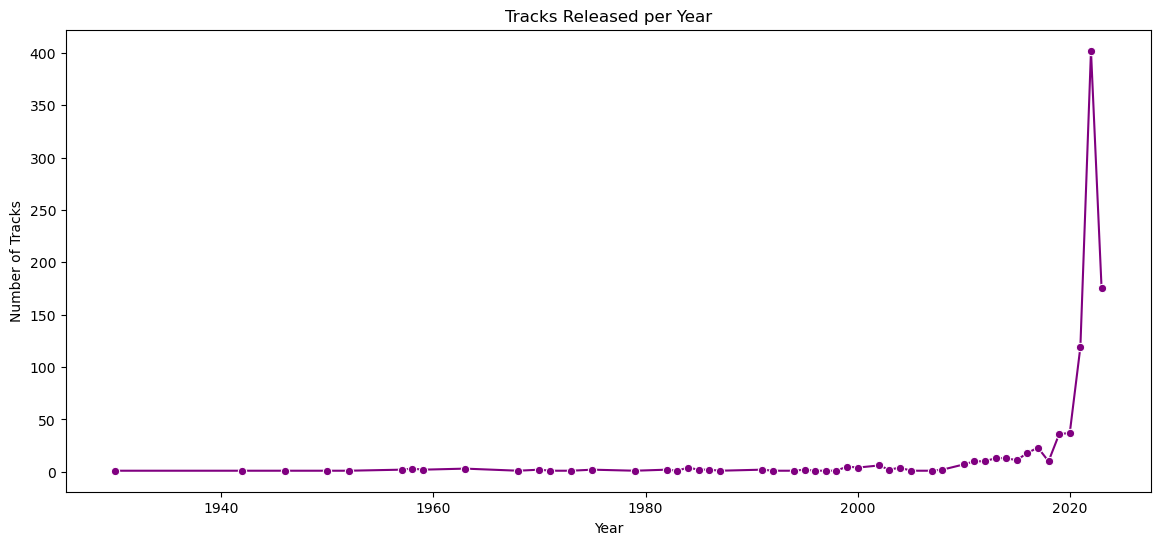

In [29]:
# Temporal Trends
tracks_by_year = spotify_data['released_year'].value_counts().sort_index().reset_index()
tracks_by_year.columns = ['Year', 'Number_of_Tracks']
plt.figure(figsize=(14, 6))
sns.lineplot(data=tracks_by_year, x='Year', y='Number_of_Tracks', marker='o', color='purple')
plt.title("Tracks Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.show()

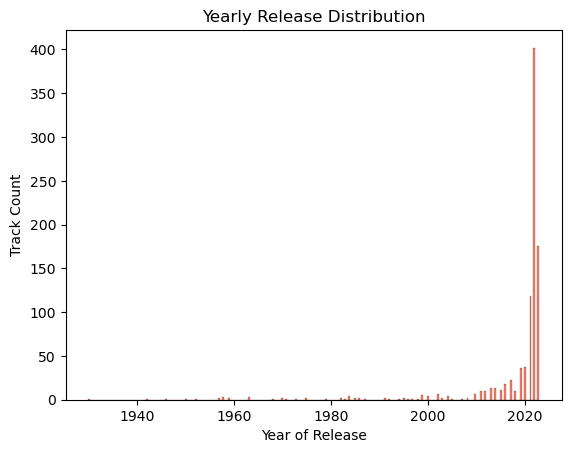

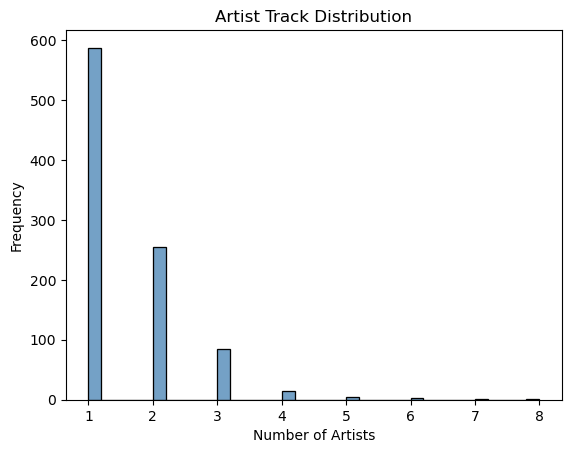

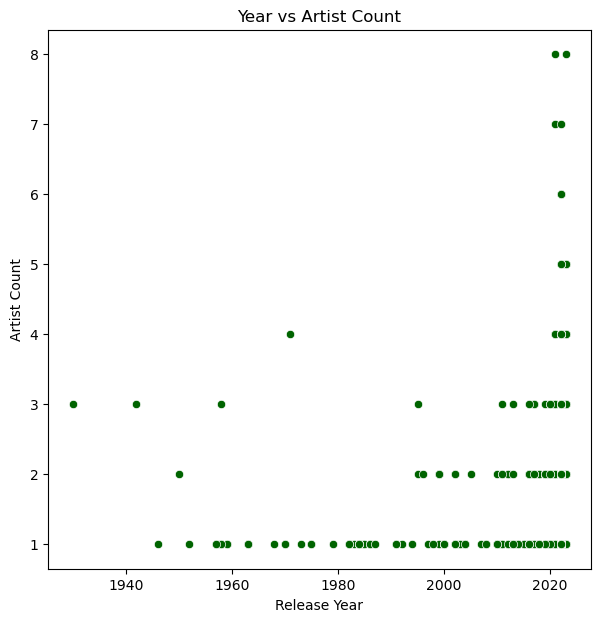


Track Counts by Month:
 released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: count, dtype: int64


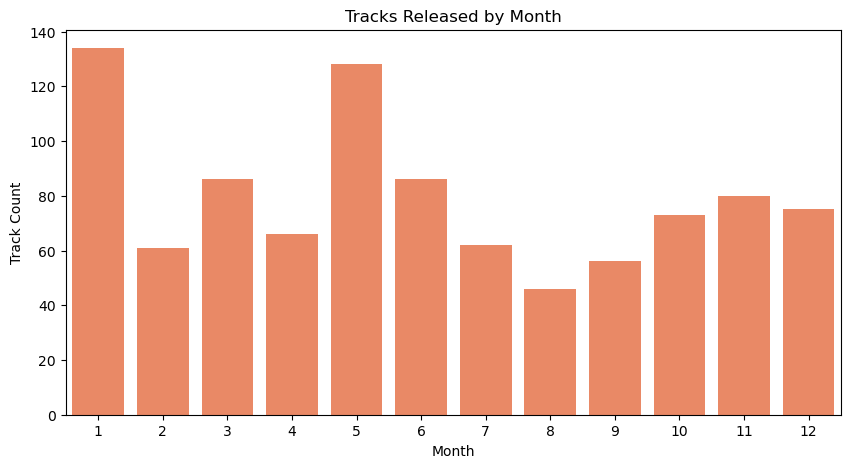

In [37]:
# Plotting distribution of 'released_year' with red bars
sns.histplot(spotify_data['released_year'], kde=False, color='#FF5733')
# Setting title and labels
plt.title('Yearly Release Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Track Count')
plt.show()

# Plotting distribution of 'artist_count' with blue bars
sns.histplot(spotify_data['artist_count'], kde=False, color='steelblue')
# Adding title and axis labels
plt.title('Artist Track Distribution')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to show relationship between 'released_year' and 'artist_count'
plt.figure(figsize=(7, 7))
sns.scatterplot(data=spotify_data, x='released_year', y='artist_count', color='darkgreen')
# Scatter plot title and labels
plt.title('Year vs Artist Count')
plt.xlabel('Release Year')
plt.ylabel('Artist Count')
plt.show()

# Monthly Release Patterns - Assuming 'released_month' is provided as a separate column
if 'released_month' in spotify_data.columns:
    monthly_counts = spotify_data['released_month'].value_counts().sort_index()
    print("\nTrack Counts by Month:\n", monthly_counts)

    # Bar plot to show monthly release patterns
    plt.figure(figsize=(10, 5))
    sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color='coral')
    plt.xlabel("Month")
    plt.ylabel("Track Count")
    plt.title("Tracks Released by Month")
    plt.show()
else:
    print("Monthly release data not available.")


In [39]:
# Genre and Music Characteristics
correlation_data = spotify_data[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].apply(pd.to_numeric, errors='coerce')
correlation_matrix = correlation_data.corr()
print("\nCorrelation of Streams with Music Attributes:\n", correlation_matrix['streams'].sort_values(ascending=False))



Correlation of Streams with Music Attributes:
 streams           1.000000
bpm              -0.002438
acousticness_%   -0.004485
energy_%         -0.026051
valence_%        -0.040831
danceability_%   -0.105457
Name: streams, dtype: float64


In [41]:
# Correlation between selected attributes
dance_energy_corr = correlation_data[['danceability_%', 'energy_%']].corr()
valence_acoustic_corr = correlation_data[['valence_%', 'acousticness_%']].corr()

print("\nCorrelation between Danceability and Energy:\n", dance_energy_corr)
print("\nCorrelation between Valence and Acousticness:\n", valence_acoustic_corr)



Correlation between Danceability and Energy:
                 danceability_%  energy_%
danceability_%        1.000000  0.198095
energy_%              0.198095  1.000000

Correlation between Valence and Acousticness:
                 valence_%  acousticness_%
valence_%        1.000000       -0.081907
acousticness_%  -0.081907        1.000000


In [53]:
# Summing track counts across each platform column, ignoring non-numeric values
spotify_track_total = spotify_data['in_spotify_playlists'].apply(pd.to_numeric, errors='coerce').sum()
deezer_track_total = spotify_data['in_deezer_playlists'].apply(pd.to_numeric, errors='coerce').sum()
apple_track_total = spotify_data['in_apple_playlists'].apply(pd.to_numeric, errors='coerce').sum()

# Displaying the results
print("Track Counts per Platform:")
print(f"Total tracks in Spotify playlists: {spotify_track_total}")
print(f"Total tracks in Deezer playlists: {deezer_track_total}")
print(f"Total tracks in Apple playlists: {apple_track_total}")


Track Counts per Platform:
Total tracks in Spotify playlists: 4955719
Total tracks in Deezer playlists: 95913.0
Total tracks in Apple playlists: 64625


In [45]:
# Advanced Analysis
# Track patterns by key and mode
key_mode_pattern = spotify_data.groupby(['key', 'mode'])['streams'].mean().unstack()
print("\nAverage Streams by Key and Mode:\n", key_mode_pattern)



Average Streams by Key and Mode:
 mode         Major         Minor
key                             
A     4.019603e+08  4.173906e+08
A#    6.275336e+08  4.849231e+08
B     4.363336e+08  5.825110e+08
C#    6.285883e+08  5.665252e+08
D     5.720180e+08  3.425588e+08
D#    6.819623e+08  4.793647e+08
E     7.605963e+08  5.083264e+08
F     5.279311e+08  4.102836e+08
F#    4.175450e+08  5.954921e+08
G     4.929813e+08  3.637593e+08
G#    5.458044e+08  3.219036e+08


In [55]:
# Genre or artist playlist appearance frequency
artist_playlist_counts = spotify_data.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists']].sum()
top_playlist_artists = artist_playlist_counts.sort_values(by=['in_spotify_playlists', 'in_apple_playlists'], ascending=False).head(5)
print("\nArtists with Highest Playlist Appearances:\n", top_playlist_artists)


Artists with Highest Playlist Appearances:
                 in_spotify_playlists  in_apple_playlists
artist(s)_name                                          
The Weeknd                    144053                1677
Taylor Swift                  132974                1796
Ed Sheeran                    128758                1448
Harry Styles                  110026                1741
Eminem                         87331                 475
